### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load predicted
raw_predicted = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f2.csv")

# Load actual
raw_actual = pd.read_csv("../../../../data/dataset/cleaned-en-simlex-999.csv")

# Drop first word pair
raw_actual = raw_actual.iloc[1:].reset_index(drop=True)

In [3]:
# Select first 25 word pairs
raw_predicted = raw_predicted.head(25)
raw_actual = raw_actual.head(25)

In [4]:
# Show results
raw_predicted

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,smart,intelligent,8.50,7.0,8.5,8.5,8.5,8.5,9.5,9.5,9.00,8.75,9.5,8.5,9.5,9.5,8.50
1,hard,difficult,7.50,6.0,8.0,8.0,7.0,6.5,7.0,8.5,8.50,8.25,8.0,8.6,8.0,7.5,7.50
2,happy,cheerful,6.75,8.5,9.0,8.0,8.5,7.5,8.5,7.5,8.00,8.50,8.5,8.7,7.0,8.5,7.50
3,hard,easy,2.00,2.0,3.0,2.0,4.0,2.5,4.0,1.0,1.50,1.50,4.0,2.0,2.0,3.0,1.50
4,fast,rapid,8.50,9.0,9.5,9.5,9.0,9.0,9.5,9.5,9.50,9.00,9.5,9.0,9.5,8.0,9.00
5,happy,glad,7.25,7.5,8.5,8.0,7.5,7.0,7.5,8.0,7.50,8.25,7.0,8.5,6.0,7.5,8.00
6,short,long,6.00,5.0,7.5,5.0,7.0,5.5,6.5,8.5,7.00,7.00,8.5,7.5,7.0,7.0,6.50
7,stupid,dumb,8.00,8.5,8.5,8.5,7.5,8.5,8.5,8.0,8.50,9.25,9.0,8.8,9.0,9.0,8.50
8,weird,strange,7.50,9.0,9.0,9.0,8.0,8.0,8.0,9.0,9.50,8.75,8.0,9.0,7.5,8.0,8.50
9,wide,narrow,6.75,4.0,7.0,7.0,6.0,6.0,7.5,7.5,5.00,7.00,6.0,7.0,6.5,4.5,5.50


### **1. Data Quality**

In [5]:
# Basic info
raw_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   word1                25 non-null     object 
 1   word2                25 non-null     object 
 2   similarity_score_1   25 non-null     float64
 3   similarity_score_2   25 non-null     float64
 4   similarity_score_3   25 non-null     float64
 5   similarity_score_4   25 non-null     float64
 6   similarity_score_5   25 non-null     float64
 7   similarity_score_6   25 non-null     float64
 8   similarity_score_7   25 non-null     float64
 9   similarity_score_8   25 non-null     float64
 10  similarity_score_9   25 non-null     float64
 11  similarity_score_10  25 non-null     float64
 12  similarity_score_11  25 non-null     float64
 13  similarity_score_12  25 non-null     float64
 14  similarity_score_13  25 non-null     float64
 15  similarity_score_14  25 non-null     float

In [6]:
# Missing values per column
raw_predicted.isnull().sum()

word1                  0
word2                  0
similarity_score_1     0
similarity_score_2     0
similarity_score_3     0
similarity_score_4     0
similarity_score_5     0
similarity_score_6     0
similarity_score_7     0
similarity_score_8     0
similarity_score_9     0
similarity_score_10    0
similarity_score_11    0
similarity_score_12    0
similarity_score_13    0
similarity_score_14    0
similarity_score_15    0
dtype: int64

In [7]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word1 Predicted', 'Word2 Actual', 'Word2 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: True
No differences found


### **2. Data Processing**

In [8]:
# Copy dataframe
predicted = raw_predicted.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
predicted['pred_sl'] = predicted[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
predicted['pred_sd'] = predicted[similarity_cols].std(axis=1).round(2)

# Select columns
predicted = predicted[['word1', 'word2', 'pred_sl', 'pred_sd']]

# Show results
predicted

,word1,word2,pred_sl,pred_sd
0,smart,intelligent,8.78,0.67
1,hard,difficult,7.66,0.76
2,happy,cheerful,8.06,0.67
3,hard,easy,2.40,0.99
4,fast,rapid,9.13,0.44
5,happy,glad,7.60,0.65
6,short,long,6.77,1.07
7,stupid,dumb,8.54,0.45
8,weird,strange,8.45,0.63
9,wide,narrow,6.22,1.07


In [9]:
# Copy dataframe
actual = raw_actual.copy()

# Rename columns
actual = actual.rename(columns={'SimLex999': 'act_sl', 'std_dev': 'act_sd'})

# Select columns
actual = actual[['word1', 'word2', 'act_sl', 'act_sd']]

# Show results
actual

,word1,word2,act_sl,act_sd
0,smart,intelligent,9.20,0.67
1,hard,difficult,8.77,1.19
2,happy,cheerful,9.55,2.18
3,hard,easy,0.95,0.93
4,fast,rapid,8.75,1.68
5,happy,glad,9.17,1.59
6,short,long,1.23,1.58
7,stupid,dumb,9.58,1.48
8,weird,strange,8.93,1.30
9,wide,narrow,1.03,0.58


In [10]:
# Merge predicted and actual DataFrames
merged = pd.merge(predicted, actual, on=['word1', 'word2'])

# Show results
merged

,word1,word2,pred_sl,pred_sd,act_sl,act_sd
0,smart,intelligent,8.78,0.67,9.20,0.67
1,hard,difficult,7.66,0.76,8.77,1.19
2,happy,cheerful,8.06,0.67,9.55,2.18
3,hard,easy,2.40,0.99,0.95,0.93
4,fast,rapid,9.13,0.44,8.75,1.68
5,happy,glad,7.60,0.65,9.17,1.59
6,short,long,6.77,1.07,1.23,1.58
7,stupid,dumb,8.54,0.45,9.58,1.48
8,weird,strange,8.45,0.63,8.93,1.30
9,wide,narrow,6.22,1.07,1.03,0.58


### **3. Descriptive Statistics**

In [11]:
# Summary statistics SimLex-999
pred_sl_summary = round(predicted['pred_sl'].describe(), 2)
act_sl_summary = round(actual['act_sl'].describe(), 2)

# Add median SimLex-999
pred_sl_summary['median'] = round(predicted['pred_sl'].median(), 2)
act_sl_summary['median'] = round(actual['act_sl'].median(), 2)

# Summary statistics standard deviations
pred_sd_summary = round(predicted['pred_sd'].describe(), 2)
act_sd_summary = round(actual['act_sd'].describe(), 2)

# Add median standard deviation
pred_sd_summary['median'] = round(predicted['pred_sd'].median(), 2)
act_sd_summary['median'] = round(actual['act_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "pred_sl": pred_sl_summary,
    "act_sl": act_sl_summary,
    "pred_sd": pred_sd_summary,
    "act_sd": act_sd_summary
})

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,25.00,25.00,25.00,25.00
mean,7.36,6.21,0.77,1.23
std,1.65,3.79,0.33,0.42
min,2.40,0.55,0.36,0.36
25%,6.77,1.23,0.52,1.03
50%,7.95,8.42,0.67,1.27
75%,8.53,9.17,0.97,1.48
max,9.13,9.70,1.85,2.18
median,7.95,8.42,0.67,1.27


#### **3.1. SimLex-999**

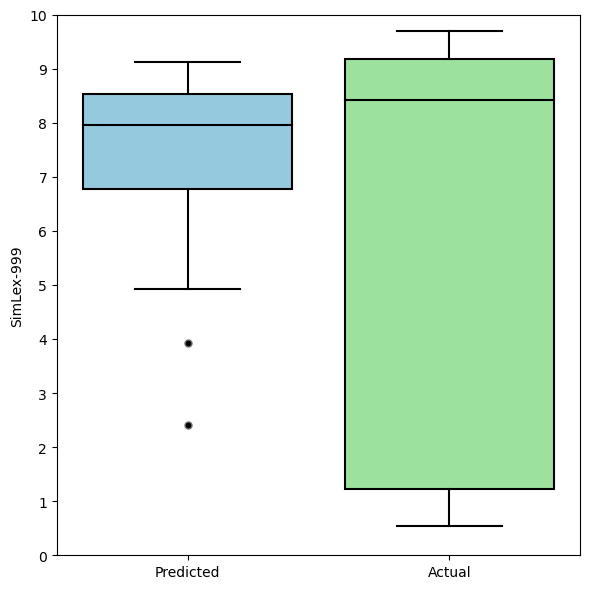

In [12]:
# Rename columns and copy
renamed_pred_sl = predicted.rename(columns={"pred_sl": "SimLex-999"}).copy()
renamed_act_sl = actual.rename(columns={"act_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_pred_sl['Score'] = 'Predicted'
renamed_act_sl['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_pred_sl, renamed_act_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

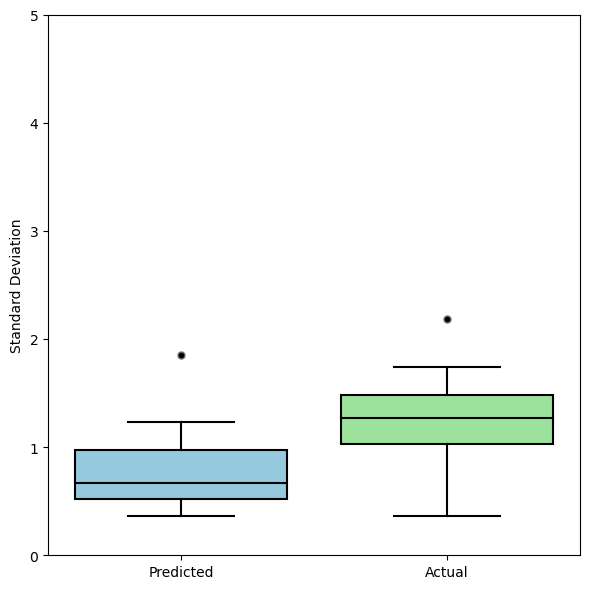

In [13]:
# Rename columns and copy
renamed_predicted_sd = predicted.rename(columns={"pred_sd": "Standard Deviation"}).copy()
renamed_actual_sd = actual.rename(columns={"act_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_predicted_sd['Score'] = 'Predicted'
renamed_actual_sd['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_predicted_sd, renamed_actual_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Distributions**

#### **4.1. SimLex-999**

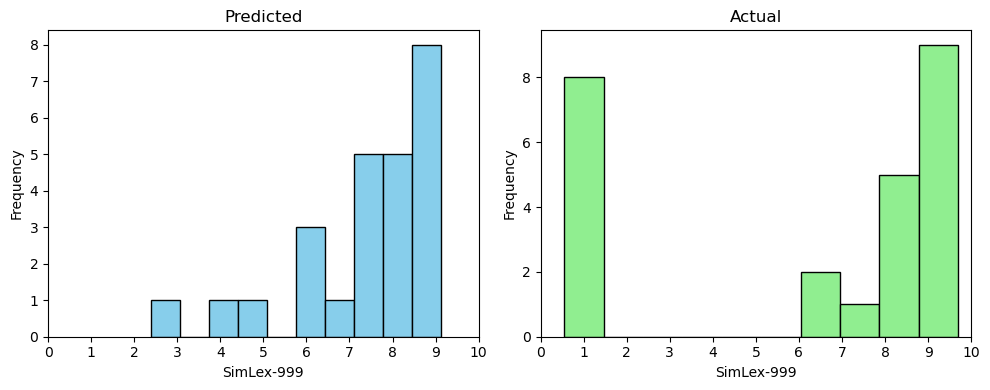

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot predicted histogram
axes[0].hist(renamed_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_act_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **4.2. Standard Deviation**

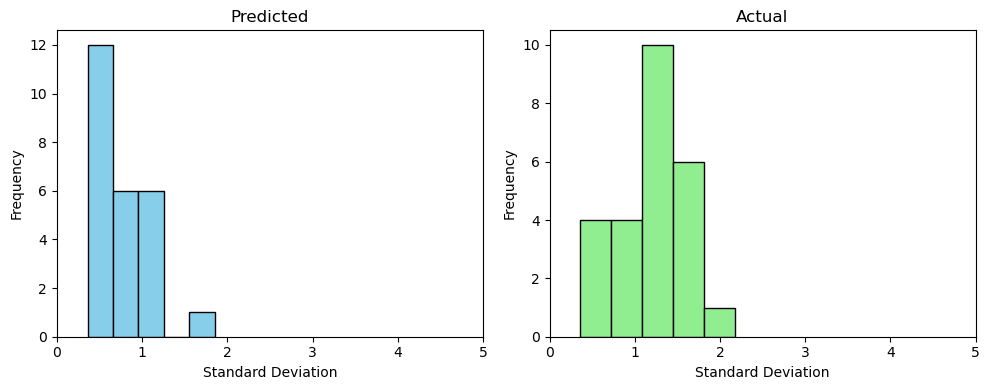

In [15]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot predicted histogram
axes[0].hist(renamed_predicted_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_actual_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **5. Outliers**

#### **5.1. Predicted**

In [16]:
# Count outliers
print_outlier_counts(predicted)

Outliers in pred_sl: 2
Outliers in pred_sd: 1


In [17]:
# Row outliers
print_outlier_data(predicted, 'pred_sd')


Outliers in pred_sd:
   word1      word2  pred_sl  pred_sd
11  easy  difficult     4.93     1.85


#### **5.2. Actual**

In [18]:
# Count outliers
print_outlier_counts(actual)

Outliers in act_sd: 1
No outliers found in columns: act_sl


In [19]:
# Row outliers
print_outlier_data(actual, 'act_sd')


Outliers in act_sd:
   word1     word2  act_sl  act_sd
2  happy  cheerful    9.55    2.18


#### **5.3. Add to Summary**

In [20]:
# Calculate outliers
outliers_pred_sl = calculate_outliers(predicted, 'pred_sl')
outliers_pred_sd = calculate_outliers(predicted, 'pred_sd')
outliers_act_sl = calculate_outliers(actual, 'act_sl')
outliers_act_sd = calculate_outliers(actual, 'act_sd')

# Count outliers
count_outliers_pred_sl = outliers_pred_sl.shape[0]
count_outliers_pred_sd = outliers_pred_sd.shape[0]
count_outliers_act_sl = outliers_act_sl.shape[0]
count_outliers_act_sd = outliers_act_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_pred_sl, count_outliers_act_sl, count_outliers_pred_sd, count_outliers_act_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,25.00,25.00,25.00,25.00
mean,7.36,6.21,0.77,1.23
std,1.65,3.79,0.33,0.42
min,2.40,0.55,0.36,0.36
25%,6.77,1.23,0.52,1.03
50%,7.95,8.42,0.67,1.27
75%,8.53,9.17,0.97,1.48
max,9.13,9.70,1.85,2.18
median,7.95,8.42,0.67,1.27
outliers,2.00,0.00,1.00,1.00


### **6. Correlation**

#### **6.1. SimLex-999 vs Standard Deviation**

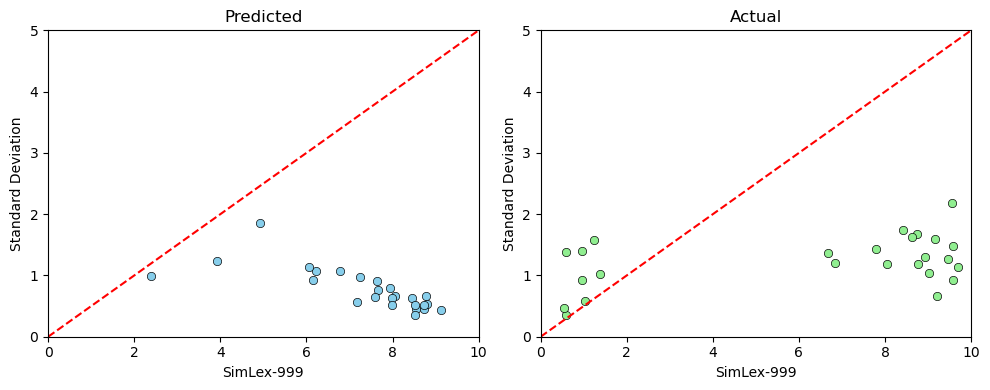

In [21]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='pred_sl', y='pred_sd', data=predicted, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Predicted')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='act_sl', y='act_sd', data=actual, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('Actual')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [22]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(merged, 'pred_sl', 'pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(merged, 'act_sl', 'act_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,pred_sl,pred_sd,-0.84273,1.253025e-07,significant
1,act_sl,act_sd,0.26043,2.086302e-01,not significant


### **7. Evaluation Metrics**

#### **7.1. Spearmans's Rank Correlation**

##### **7.1.1. Actual SimLex-999 vs Predicted SimLex-999**

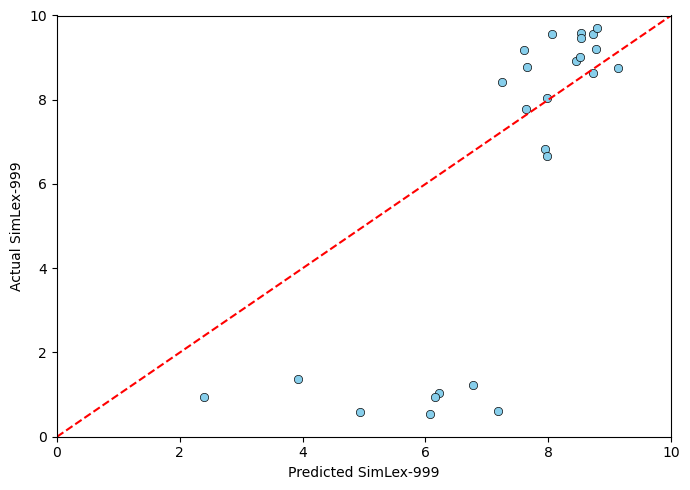

In [23]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sl', 'act_sl', 'Predicted SimLex-999', 'Actual SimLex-999', 0, 10, 0, 10)

In [24]:
# Correlation and pvalue
print_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Spearman's Rank correlation: 0.82378
P-value: 4.2025070918701614e-07
The correlation is statistically significant.



##### **7.1.2. Actual Standard Deviation vs Predicted Standard Deviation**

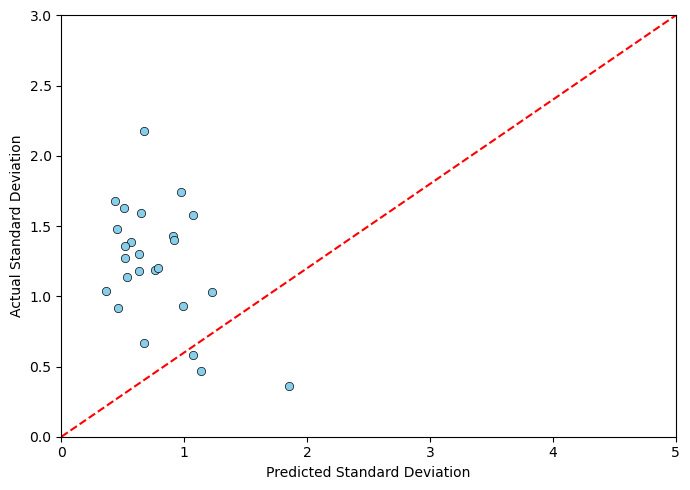

In [25]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sd', 'act_sd', 'Predicted Standard Deviation', 'Actual Standard Deviation', 0, 5, 0, 3)

In [26]:
# Correlation and p-value
print_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Spearman's Rank correlation: -0.31717
P-value: 0.12238363850911227
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [27]:
# Calculate Mean Squared Error
mse = mean_squared_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8.02


#### **7.3. Mean Absolute Error (MAE)**

In [28]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.00


#### **7.4. Bland-Altman**

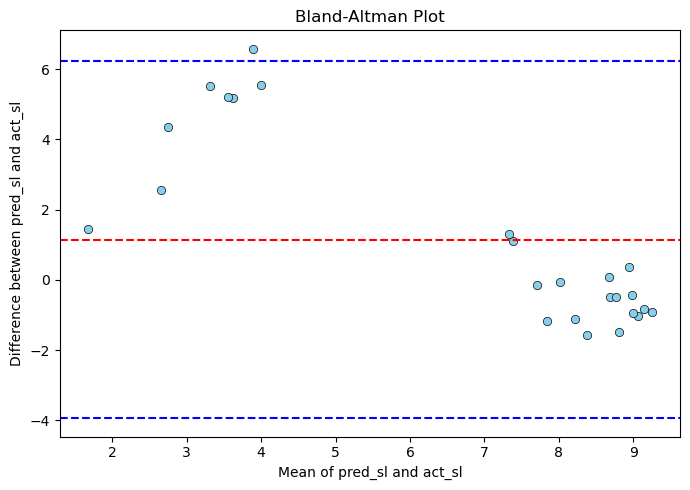

In [29]:
# SimLex-999
bland_altman_plot(data1=merged['pred_sl'], data2=merged['act_sl'])

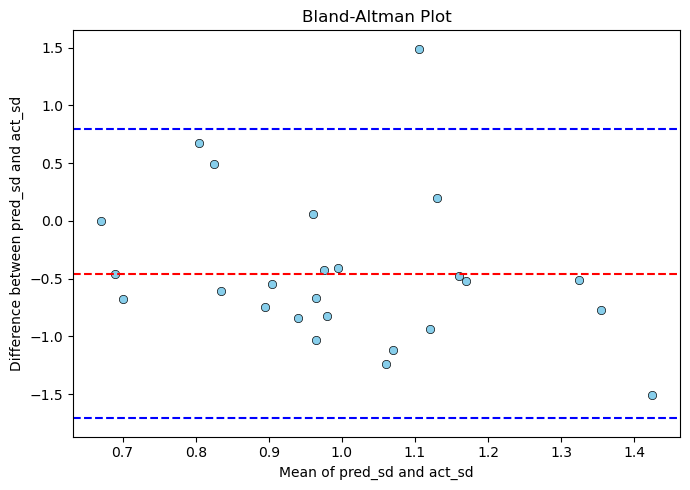

In [30]:
# Standard Deviation
bland_altman_plot(data1=merged['pred_sd'], data2=merged['act_sd'])